<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/Evaluation_UFJF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

key="1S54P4H2w551PGGT2K0hhcpHvF8L7obwUObfTgRcnjt0"
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv"
df = pd.read_csv(url_csv_file)

df = df[(df['Choose your course:']=='STE05 - Introduction to astro particle physics')] 

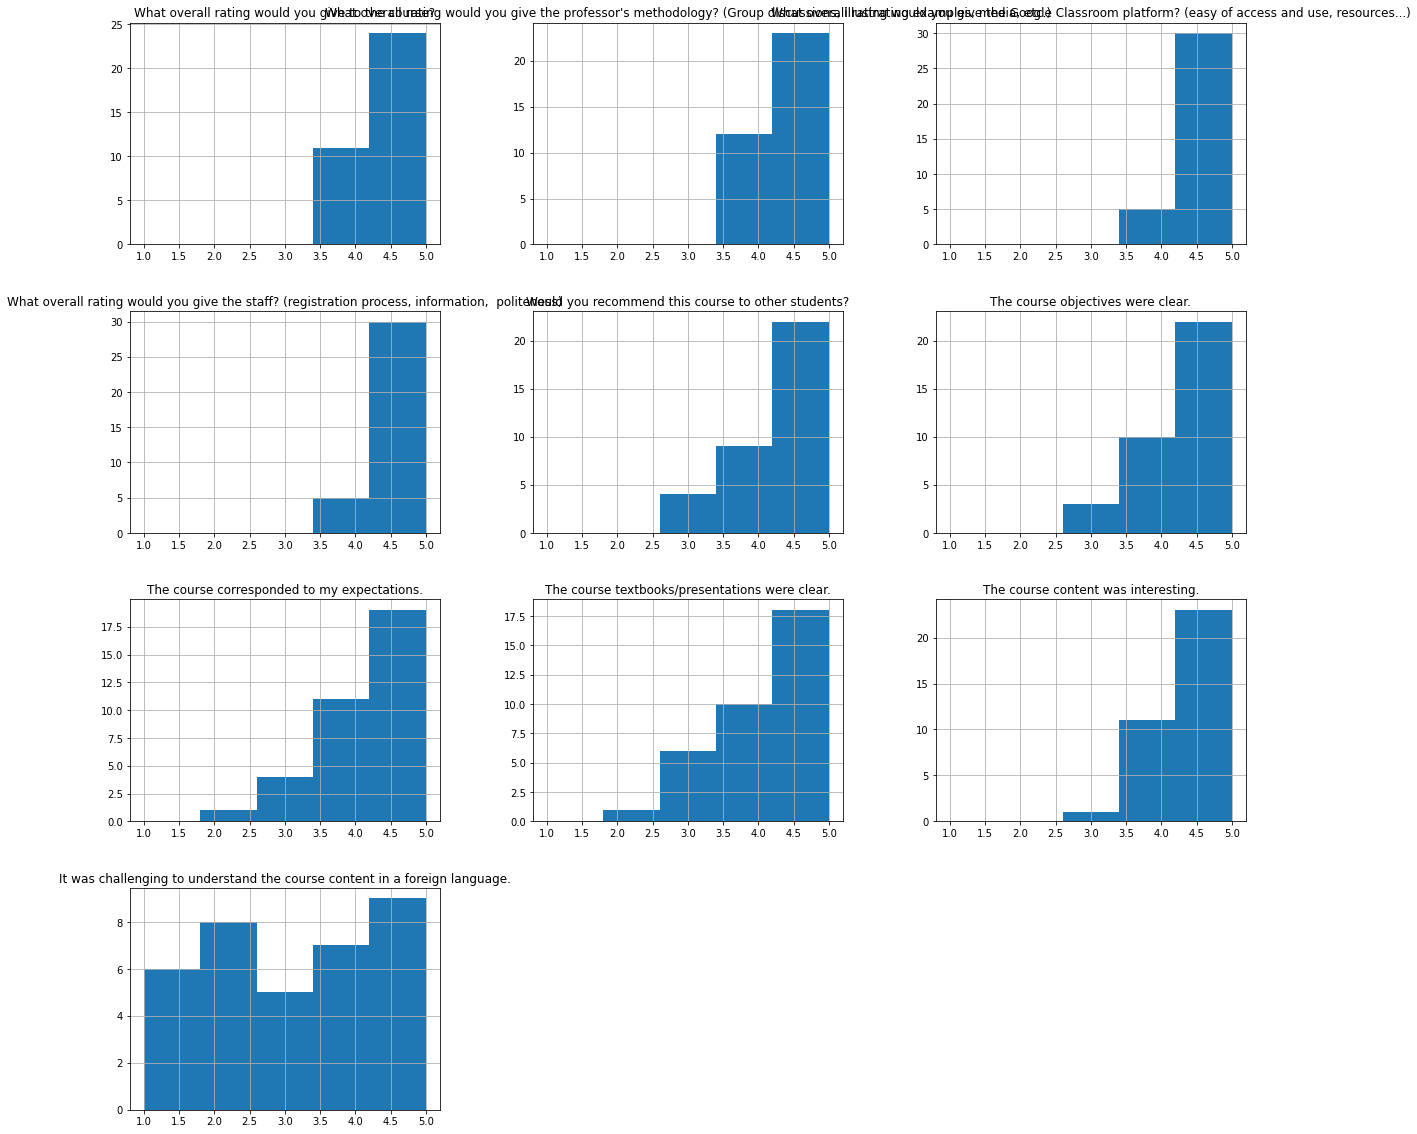

,What overall rating would you give to the course?,"What overall rating would you give the professor's methodology? (Group discussions, illustrating examples, media, etc.)","What overall rating would you give the Google Classroom platform? (easy of access and use, resources...)","What overall rating would you give the staff? (registration process, information, politeness)",Would you recommend this course to other students?,The course objectives were clear.,The course corresponded to my expectations.,The course textbooks/presentations were clear.,The course content was interesting.,It was challenging to understand the course content in a foreign language.
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4.685714,4.657143,4.857143,4.857143,4.514286,4.542857,4.371429,4.285714,4.628571,3.142857
std,0.471008,0.481594,0.355036,0.355036,0.701739,0.657216,0.807528,0.859939,0.546955,1.478132
min,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000
25%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [25]:
df.hist(bins=5, figsize=(20,20), range=(1,5))
plt.show()
df.describe()

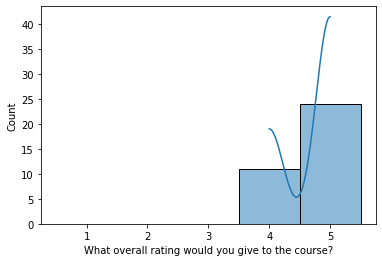

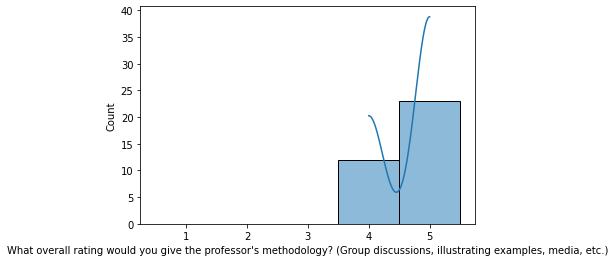

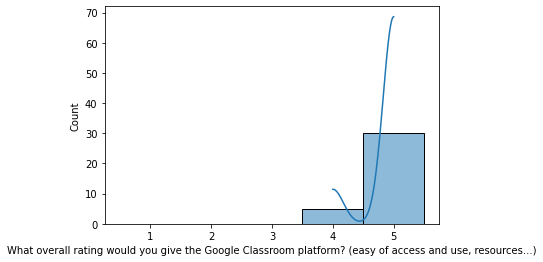

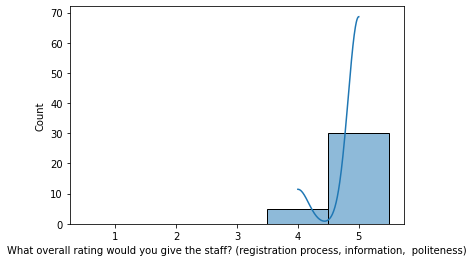

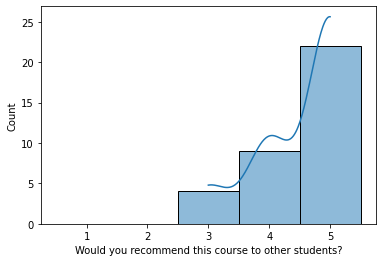

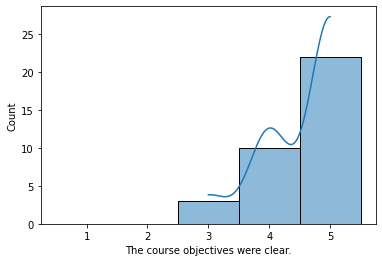

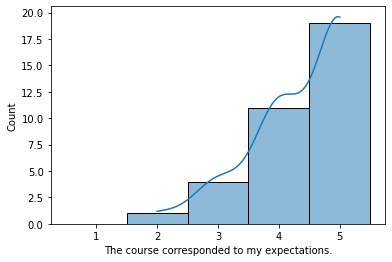

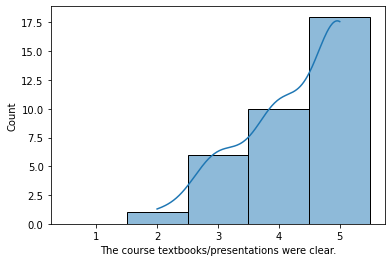

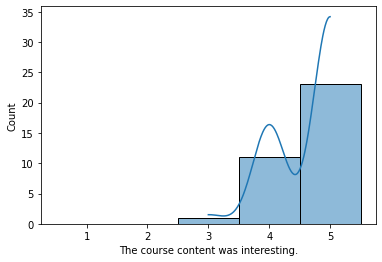

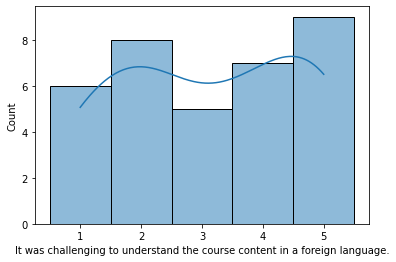

In [26]:
#plt.figure()
#sns.histplot(df, kde=True, bins=5, binrange=(1,5), discrete=True) 
for i, column in enumerate(df.columns):

  if i>4 and i<len(df.columns)-1:
    #print (i,column)
    plt.figure()
    sns.histplot(df[column], kde=True, bins=5, binrange=(1,5), discrete=True)
    plt.show()

Index(['Timestamp', 'Email Address',
       'You full name (as you wish to appear in your certificate)',
       'Your Home Institution', 'Choose your course:',
       'What overall rating would you give to the course?',
       'What overall rating would you give the professor's methodology? (Group discussions, illustrating examples, media, etc.)',
       'What overall rating would you give the Google Classroom platform? (easy of access and use, resources...)',
       'What overall rating would you give the staff? (registration process, information,  politeness)',
       'Would you recommend this course to other students?',
       'The course objectives were clear.',
       'The course corresponded to my expectations.',
       'The course textbooks/presentations were clear.',
       'The course content was interesting.',
       'It was challenging to understand the course content in a foreign language.',
       'Please provide any comments or suggestions that might help improve this cou